`ApJdataFrames` Pecault2013
---
`Title`: INTRINSIC COLORS, TEMPERATURES, AND BOLOMETRIC CORRECTIONS OF PRE-MAIN-SEQUENCE STARS  
`Authors`: Mark J. Pecaut and Eric E. Mamajek

Data is from this paper:  
http://iopscience.iop.org/0067-0049/208/1/9/article

In [2]:
%pylab inline

import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import ascii

## Table 6 - Intrinsic Colors of 5–30 Myr Old Stars and Adopted Teff, Bolometric Correction Values

In [3]:
tbl6 = ascii.read("http://iopscience.iop.org/0067-0049/208/1/9/suppdata/apjs480616t6_mrt.txt")

In [4]:
tbl6.columns

<TableColumns names=('SpType','Teff','B-V','V-Ic','V-Ks','J-H','H-Ks','Ks-W1','Ks-W2','Ks-W3','Ks-W4','BCV','BCJ')>

In [5]:
tbl6[["SpType", "Teff", "BCJ"]]

SpType,Teff,BCJ
,K,mag
string16,int64,float64
F0,7280,0.57
F1,6990,0.68
F2,6710,0.75
F3,6660,0.76
F4,6590,0.79
F5,6420,0.85
F6,6250,0.91
F7,6140,0.95


Boo! Their $BC_J$ does not go past M5!

## Table 10 - T_eff, Bolometric Correction, and Bolometric Magnitude Polynomial Coefficients for 5-30 Myr Old Stars

In [6]:
import pandas as pd

In [7]:
tbl10 = pd.read_csv("http://iopscience.iop.org/0067-0049/208/1/9/suppdata/apjs480616t10_ascii.txt", skip_footer=1,
                    skiprows=[0,1,2], header=0, sep='\t', na_values='\ldots')
del tbl10["Unnamed: 11"]
tbl10

,Y,X,Range,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7
0,T_eff,V - K_S,1.0 < V - K_S < 6.7,9.323430 x 10^3,-3.516011 x 10^3,1.046787 x 10^3,-1.863349 x 10^2,1.641182 x 10^1,-5.188853 x 10^-1,...,...
1,T_eff,V - J,0.8 < V - J < 5.8,9.593475 x 10^3,-5.095204 x 10^3,2.053259 x 10^3,-4.813940 x 10^2,5.816754 x 10^1,-2.779565 x 10^0,...,...
2,BC_V,V - K_S,1.0 < V - K_S < 6.7,-7.443324 x 10^-2,2.471780 x 10^-1,-1.923234 x 10^-1,1.318867 x 10^-2,-3.630511 x 10^-4,...,...,...
3,BC_V,T_eff,2750 < T_eff < 7350,-2.855844 x 10^2,3.832453 x 10^-1,-2.225832 x 10^-4,7.150667 x 10^-8,-1.364193 x 10^-11,1.542389 x 10^-15,-9.566224 x 10^-20,2.511807 x 10^-24
4,BC_J,V - K_S,1.0 < V - K_S < 6.7,-4.805196 x 10^-1,1.842350 x 10^0,-7.837156 x 10^-1,1.859281 x 10^-1,-2.153500 x 10^-2,9.489583 x 10^-4,...,...
5,BC_J,V - J,0.8 < V - J < 5.8,-4.557821 x 10^-1,2.299875 x 10^0,-1.191653 x 10^0,3.442879 x 10^-1,-4.932544 x 10^-2,2.724400 x 10^-3,...,...
6,BC_J,T_eff,2750 < T_eff < 6750,2.920272 x 10^0,-3.220428 x 10^-4,...,...,...,...,...,...


The coefficients are:  
$Y = a_0 + a_1X$

In [8]:
a_0 = np.float(tbl10.get_value(6, "a_0")[0:8])*10**(0.0)
a_1 = np.float(tbl10.get_value(6, "a_1")[0:9])*10**(-4.0)
print a_0, a_1

2.920272 -0.0003220428


In [9]:
X = tbl6["Teff"]
Y = tbl6["BCJ"]
p = np.poly1d([a_1, a_0]) # Input: "The polynomial's coefficients, in decreasing powers"
print p
Y_fit = p(X)
print Y_fit.shape, X.shape

 
-0.000322 x + 2.92
(40,) (40,)


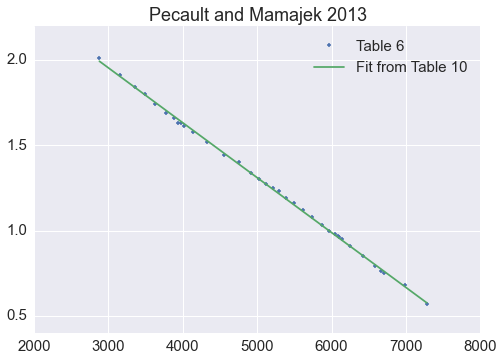

In [10]:
plt.plot(X, Y, '.', label='Table 6')
plt.plot(X, Y_fit, label='Fit from Table 10')
plt.title("Pecault and Mamajek 2013")
plt.legend(loc='best')

*Script finished.*